In [1]:
# import requests
# import json 
# import csv 
# import pandas as pd
# from functools import reduce
# import glob
# import datetime
# from datetime import timedelta
# from datetime import datetime
# import matplotlib.pyplot as plt

In [2]:
'''Reading json data in python file by hitting a link'''

import requests

r = requests.get('http://35.154.232.43:1200/api/stops/new?startTime=2020-02-25T10:00:00&endTime=2020-02-25T19:00:00')
# print (r.json())

# loading the data into the variable data 
a = r.json()

# Storing length of file in a variable
file_length = len(a)
# len(a)

In [3]:
# *RUN THIS CELL ONLY ONCE*

# Python program to write JSON to a file  
import json 
  
# Data to be written 
with open("25-FEB-600.json", "w") as outfile: 
    json.dump(a, outfile) 

In [4]:
'''Python program to convert JSON file to CSV '''
  
# import json 
import csv 
  
# Opening JSON file and loading the data into the variable data 
with open('25-FEB-600.json') as json_file: 
    data = json.load(json_file) 

In [5]:
# Converting json to csv 

# now we will open a file for writing 
data_file = open('25-FEB-600-1_main_file.csv', 'w', newline = '') 
  
# create the csv writer object 
csv_writer = csv.writer(data_file) 
  
# Counter variable used for writing  
# headers to the CSV file 
count = 0
  
for dt in data: 
    
    if count == 0: 
        # Writing headers of CSV file 
        header = dt.keys() 
        csv_writer.writerow(header) 
        count += 1
        
    # Writing data of CSV file 
    csv_writer.writerow(dt.values()) 
    
data_file.close() 

In [6]:
'''REMOVING THE UNDEFINED DATA ROWS FROM THE FILE AND WRITING IN NEW FILE'''

# import csv
with open('25-FEB-600-1_main_file.csv', 'r') as inp, open('25-FEB-600-2_removedUNDEFINED.csv', 'w', newline = '') as out:
    writer = csv.writer(out)
    for row in csv.reader(inp):
        try:
            if row[5].isdigit() != 0 or row[5]=='__v':
                writer.writerow(row)
        except IndexError:
            continue
            
inp.close()
out.close()

In [7]:
''' FIND AND REPLACE OPERATIONS IN DATAFRAME '''
#  REPLACING Z with '' AND T with ' ' in start_time and end_time columns

import pandas as pd

df = pd.read_csv('25-FEB-600-2_removedUNDEFINED.csv')

df['start_time'] = df['start_time'].str.replace('Z', '')
df['start_time'] = df['start_time'].str.replace('T', ' ')
df['end_time'] = df['end_time'].str.replace('Z', '')
df['end_time'] = df['end_time'].str.replace('T', ' ')

# COMMITING THE CHANGES MADE IN DATAFRAME TO THE SAME CSV FILE
df.to_csv('25-FEB-600-2_find_replace.csv', index=False)

In [8]:
''' Mapping fault names from different files to main file '''

from functools import reduce
import glob

file1 = glob.glob('25-FEB-600-2_find_replace.csv')
df1 = [pd.read_csv(fp) for fp in file1]
# df1 
# '''[1601 rows x 6 columns]'''

In [9]:
# df2 = reduce(lambda left,right: pd.merge(left,right,on='stop_name'), df1)

In [10]:
# import glob

file2_1 = glob.glob('case_packer.csv')
df2_11 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_1]

df2_12 = pd.concat(df2_11)
df2_12['machine_name'] = 'case_packer'
df2_12

df2_case_packer = pd.merge(df, df2_12, on=['stop_name', 'machine_name'])
# df2_case_packer

total_case_packer = df2_case_packer['start_time'].count() 

In [11]:
file2_2 = glob.glob('case_erector.csv')
df2_21 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_2]

df2_22 = pd.concat(df2_21)
df2_22['machine_name'] = 'case_erector'
df2_22

df2_case_erector=pd.merge(df, df2_22, on=['stop_name', 'machine_name'])
# df2_case_erector

total_case_erector = df2_case_erector['start_time'].count() 

In [12]:
file2_3 = glob.glob('filler.csv')
df2_31 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_3]

df2_32 = pd.concat(df2_31)
df2_32['machine_name'] = 'filler'
df2_32

df2_filler=pd.merge(df, df2_32, on=['stop_name', 'machine_name'])
# df2_filler

total_filler = df2_filler['start_time'].count() 

In [13]:
file2_4 = glob.glob('labeller.csv')
df2_41 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_4]

df2_42 = pd.concat(df2_41)
df2_42['machine_name'] = 'labeller'
df2_42

df2_labeller=pd.merge(df, df2_42, on=['stop_name', 'machine_name'])
# df2_labeller

total_labeller = df2_labeller['start_time'].count() 

In [14]:
file2_5 = glob.glob('palletiser.csv')
df2_51 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_5]

df2_52 = pd.concat(df2_51)
df2_52['machine_name'] = 'palletiser'
df2_52

df2_palletiser=pd.merge(df, df2_52, on=['stop_name', 'machine_name'])
# df2_palletiser

total_palletiser = df2_palletiser['start_time'].count() 

In [15]:
file2_6 = glob.glob('vertilator.csv')
df2_61 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_6]

df2_62 = pd.concat(df2_61)
df2_62['machine_name'] = 'vertilator'
df2_62

df2_vertilator=pd.merge(df, df2_62, on=['stop_name', 'machine_name'])
# df2_vertilator

total_vertilator = df2_vertilator['start_time'].count() 

In [16]:
file2_7 = glob.glob('case_sealer.csv')
df2_71 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_7]

df2_72 = pd.concat(df2_71)
df2_72['machine_name'] = 'case_sealer'
df2_72

df2_case_sealer=pd.merge(df, df2_72, on=['stop_name', 'machine_name'])
# df2_case_sealer

total_case_sealer = df2_case_sealer['start_time'].count() 

In [17]:
file2_8 = glob.glob('induction.csv')
df2_81 = [pd.read_csv(fp, index_col = ['stop_name']) for fp in file2_8]

df2_82 = pd.concat(df2_81)
df2_82['machine_name'] = 'induction'
df2_82

df2_induction=pd.merge(df, df2_82, on=['stop_name', 'machine_name'])
# df2_induction

total_induction = df2_induction['start_time'].count() 

In [18]:
# Concatenating all the dataframes mapped differently

df2 = pd.concat([df2_case_erector, df2_case_packer, df2_case_sealer, df2_filler, df2_induction, df2_labeller, df2_palletiser, df2_vertilator], axis=0)

In [19]:
# Reflecting the concatenated values to the csv file

df2.to_csv('25-FEB-600-3_mapped_faults.csv', index=False)

In [20]:
''' Finding difference in TIMESTAMP COLUMNS TO CSV FILE '''

# import pandas as pd
csv_input = pd.read_csv('25-FEB-600-3_mapped_faults.csv')

end_time = list(csv_input['end_time'])
start_time = list(csv_input['start_time'])

In [21]:
# Calculating difference etween the end and start time

import datetime
from datetime import timedelta
 
datetimeFormat = '%Y-%m-%d %H:%M:%S.%f'
list3 = []
for i in range(len(csv_input)):
    date1 = end_time[i]
    date2 = start_time[i]
    diff = datetime.datetime.strptime(date1, datetimeFormat)\
        - datetime.datetime.strptime(date2, datetimeFormat)
    
    list3.append(diff)

# list3

In [22]:
# storing diff in list

from datetime import datetime

def convert_timedelta(duration):
    days, seconds, microseconds = duration.days, duration.seconds, duration.microseconds
    hours = days * 24 + seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds += microseconds/1000000
    seconds = seconds % 60
    return hours, minutes, seconds
list3_1=[]
for i in list3:
    hours, minutes, seconds = convert_timedelta(i)
    try:  
        a=str(hours)+':'+str(minutes)+':'+str(round(seconds))
        datetime_object = datetime.strptime(a, '%H:%M:%S')
        list3_1.append(a)
        
    except ValueError:
        c=str(hours%24)+':'+str(minutes)+':'+str(round(seconds)%60)
        datetime_object = datetime.strptime(c, '%H:%M:%S')
        list3_1.append(c)
# list3_1

In [23]:
# reflecting diff to the main csv file

df4 = pd.read_csv('25-FEB-600-3_mapped_faults.csv')

df4_1 = pd.DataFrame(list3_1,columns = ['time_diff'])
df4['time_diff']  = df4_1

df4.to_csv('25-FEB-600-4_time_diff.csv', index=False)

In [133]:
'''Creating Frequency Count File'''

# Frequency Count in a dataframe

df5 = pd.read_csv('25-FEB-600-4_time_diff.csv')

df5_1 = pd.DataFrame({'fault_frequency' : df5.groupby(['machine_name', 'fault_name'])['time_diff'].count()}).reset_index()
df5_1

,machine_name,fault_name,fault_frequency
0,case_erector,CASE JAM IN MACHINE,1
1,case_erector,DOOR SWITCH S63 OPEN,3
2,case_erector,EMERGENCY PRESSED,2
3,case_erector,pdt,2
4,case_erector,ready,8
5,case_packer,Safety Door Open S61 132DS20,10
6,case_packer,Safety Door Open S63 132DS40,3
7,case_packer,fault_31,1
8,case_packer,fault_32,1
9,case_packer,pdt,2


In [127]:
df5_1.to_csv('25-FEB-600-5_fault_frequency.csv', index=False)

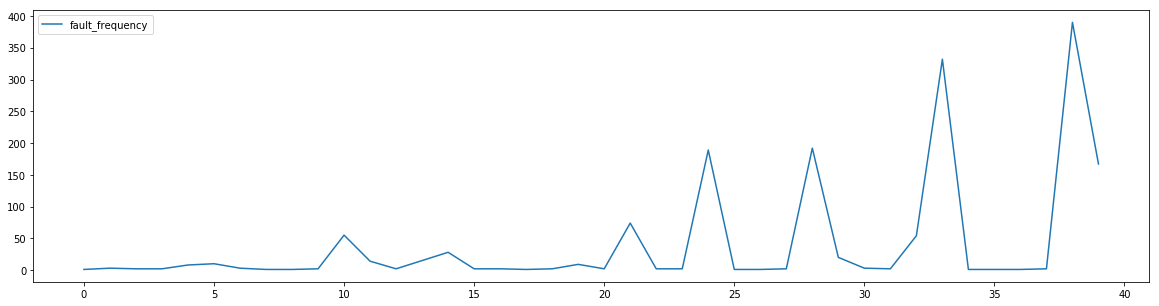

In [129]:
df5_1.plot(figsize = (20,5))

In [117]:
import matplotlib.pyplot as plt

plt.plot(df5_1['machine_name'],df['Violent'], color = 'b', label='Violent')

In [120]:
# import matplotlib.pyplot as plt
# df5_3

In [110]:
# df5_4 = pd.DataFrame(df5_3, columns = ['fault_frequency'])
# df5_4

In [121]:
# df5_4.plot(figsize = (20,5))

# # df5_5 = df5_4[df5_4['fault_name'] != 'pdt']
# df5_4['fault_frequency']

In [69]:
# df5_4.plot(subplots = True)

In [122]:
# df5_5 = pd.read_csv('25-FEB-600-5_fault_frequency.csv')

In [123]:
# df5_5

In [ ]:
# df6 = pd.read_csv('25-FEB-600-4_time_diff.csv')
# df6_1 = df6.groupby(['machine_name'])['time_diff'].sum()

# # df6_1 = df5.groupby(['machine_name'])
# df6_1